In [204]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import random

X, y = load_svmlight_file("C:\\Users\\Administrator\\Desktop\\housing.txt")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [197]:
def loss (X, W, y):
    tmp = X.dot(W) - y
    return (tmp * tmp).sum() / X.shape[0] / 2

In [198]:
def grad (X, W, y):
    tmp = X.dot(W) - y
    return X.T.dot(tmp) / X.shape[0]

In [199]:
X_train = X_train.toarray()
X_test = X_test.toarray()

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
X_test = np.column_stack((X_test, np.ones(X_test.shape[0])))

y_train = np.array(y_train).reshape(y_train.shape[0],1)
y_test = np.array(y_test).reshape(y_test.shape[0],1)

In [200]:
W = np.zeros((X_train.shape[1], 1))
for i in range(0, X_train.shape[1]):
    W[i][0] = random.uniform(-1.0, 1)

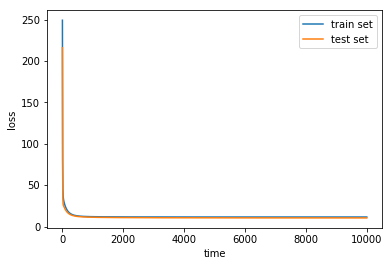

In [201]:
train = []
test = []
time = []

rate = 0.02

for i in range(1,10001):
    D = grad(X_train, W, y_train)
    W = W - rate * D
    time.append(i)
    train.append(loss(X_train, W, y_train))
    test.append(loss(X_test, W, y_test))

    
import matplotlib.pyplot as plt

plt.plot(time, train, label='train set')
plt.plot(time, test, label='test set')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')
plt.show()